In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [471]:
def load_data():
    train = pd.read_csv('train_data_iitm.csv')
    test = pd.read_csv('test_data_iitm.csv')
    tmz = pd.read_csv('taxi_zone_mapping.csv')
    return train, test, tmz

In [472]:
train, test, tmz = load_data()
train_copy = train.copy()

## Taking a quick look at the data

In [473]:
train_copy.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [474]:
train_copy.shape

(60000, 12)

##### We got 11 feature columns, and 1 target column (fare amount)
##### Numerical Columns : passenger_count, trip_dist, congestion_charge
##### Categorical Cols : VendorID, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type
##### pickup_datetime and tpep_dropoff_datetime will be converted to time of ride

In [475]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               54365 non-null  float64
 1   tpep_pickup_datetime   60000 non-null  object 
 2   tpep_dropoff_datetime  60000 non-null  object 
 3   passenger_count        54365 non-null  float64
 4   trip_distance          60000 non-null  float64
 5   RatecodeID             54365 non-null  float64
 6   store_and_fwd_flag     54365 non-null  object 
 7   PULocationID           60000 non-null  int64  
 8   DOLocationID           60000 non-null  int64  
 9   payment_type           54365 non-null  float64
 10  fare_amount            60000 non-null  float64
 11  congestion_surcharge   60000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.5+ MB


Cleary we have lots of missing data.
5635 data records with missing values.
Will have to take care of that later.

In [476]:
# converting the pickup and dropoff timings to mins elapsed in ride

In [477]:
fmt = '%Y-%m-%d %H:%M:%S'

In [478]:
a1 = train['tpep_pickup_datetime']
a2 = train['tpep_dropoff_datetime']

In [479]:
a1_d = pd.to_datetime(a1, format = fmt)
a2_d = pd.to_datetime(a2, format = fmt)

In [480]:
train_copy['time_of_ride'] = (a2_d - a1_d).dt.total_seconds()/60

In [481]:
train_copy

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5,14.316667
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0,18.000000
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5,6.266667
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5,3.500000
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5,1.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.0,2020-06-25 17:49:12,2020-06-25 17:54:26,1.0,1.70,1.0,N,229,107,1.0,7.00,2.5,5.233333
59996,2.0,2020-06-04 11:55:05,2020-06-04 12:05:04,1.0,2.36,1.0,N,79,186,2.0,9.50,2.5,9.983333
59997,1.0,2020-06-21 21:26:45,2020-06-21 21:32:33,1.0,1.40,1.0,N,186,233,1.0,6.50,2.5,5.800000
59998,2.0,2020-06-27 17:08:27,2020-06-27 17:15:33,2.0,3.18,1.0,N,262,233,1.0,11.00,2.5,7.100000


In [482]:
train_copy = train_copy.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [483]:
train_copy.corr()['fare_amount']

VendorID                0.001614
passenger_count         0.003571
trip_distance           0.867704
RatecodeID              0.107002
PULocationID           -0.120242
DOLocationID           -0.094330
payment_type           -0.082667
fare_amount             1.000000
congestion_surcharge   -0.321883
time_of_ride            0.167108
Name: fare_amount, dtype: float64

Text(0, 0.5, 'fare_amount')

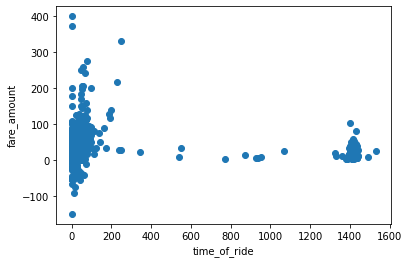

In [484]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

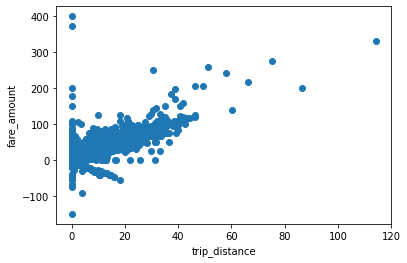

In [485]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

## Some Observations

#### There are some data points where the fare_amount is negative , will have to examine those
#### Some datapoints are charging a fare even when the trip distance is 0 and payment_type is not "No Charge"
#### Some rides have very high time_of_ride, even then the charge is quite low. These datapoints are suspicious 

### Examining negative fare_amount data points

Negative fare could be due to several reasons, such as company refunding money due to some mistake or maybe dispute with the customer or an accident. The features in the dataset do not contain the complete information required
to decide negative fare amount and hence I remove those points.

In [486]:
neg_fare_mask = train_copy['fare_amount'] < 0
neg_fare_index = train_copy[neg_fare_mask].index

In [487]:
train_copy = train_copy.drop(neg_fare_index)

Text(0, 0.5, 'fare_amount')

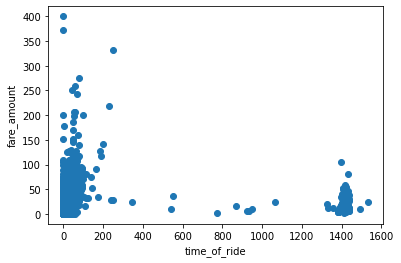

In [488]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

All the fares are positive now

Text(0, 0.5, 'fare_amount')

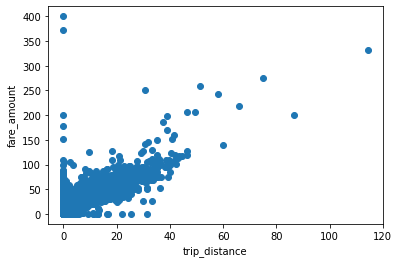

In [489]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

## Examining data points whose fare is 0 and payment type is not 3 (i.e No charge)

In [490]:
zero_fare_payment_mask = ((train_copy['fare_amount'] == 0) & (train_copy['payment_type'] != 3))
zero_fare_payment_index = train_copy[zero_fare_payment_mask].index

In [491]:
zero_fare_data = train_copy[zero_fare_payment_mask]

In [492]:
zero_fare_data = zero_fare_data.dropna()

In [493]:
zero_fare_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
1735,2.0,1.0,0.00,1.0,N,193,193,1.0,0.0,0.0,2.316667
3092,1.0,1.0,31.30,5.0,Y,92,265,2.0,0.0,0.0,56.300000
3414,2.0,1.0,22.01,2.0,N,132,166,2.0,0.0,0.0,47.500000
7751,2.0,1.0,0.00,1.0,N,193,193,1.0,0.0,0.0,1.300000
17381,2.0,1.0,0.00,1.0,N,193,7,1.0,0.0,0.0,0.683333
25185,2.0,1.0,5.22,5.0,N,195,249,1.0,0.0,0.0,14.933333
28604,1.0,4.0,0.00,5.0,Y,138,264,2.0,0.0,0.0,0.000000
33541,1.0,1.0,0.00,5.0,Y,263,264,2.0,0.0,0.0,0.000000
34716,1.0,1.0,13.00,5.0,N,107,265,1.0,0.0,0.0,27.800000
36617,2.0,2.0,4.67,4.0,N,48,265,2.0,0.0,0.0,16.400000


Removing points where time is non zero ,but the charge is 0

In [494]:
ind1_mask = (zero_fare_data['time_of_ride']) >= 2
ind1 = zero_fare_data[ind1_mask].index

In [495]:
train_copy = train_copy.drop(ind1)

Text(0, 0.5, 'fare_amount')

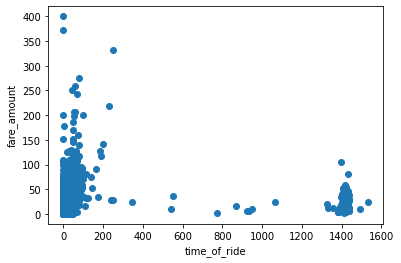

In [496]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

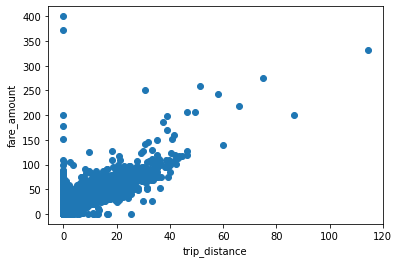

In [497]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

Examining points where time of ride is 0

In [498]:
zero_time_ride_mask = train_copy['time_of_ride'] == 0
zero_time_ride_index = train_copy[zero_time_ride_mask]

In [499]:
zero_time_data = train_copy[zero_time_ride_mask]

In [500]:
zero_time_data = zero_time_data.dropna()

In [501]:
sus_mask = (zero_time_data["congestion_surcharge"]) != (zero_time_data["fare_amount"]) 

In [502]:
sus_index = zero_time_data[sus_mask].index

In [503]:
train_copy = train_copy.drop(sus_index)

#### Points where fare_amount was not equal to congestion surcharge were removed

Text(0, 0.5, 'fare_amount')

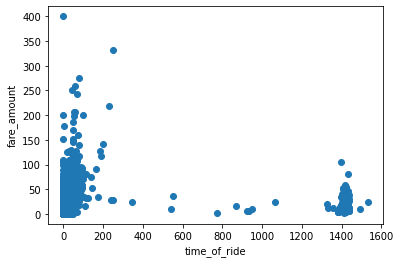

In [504]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

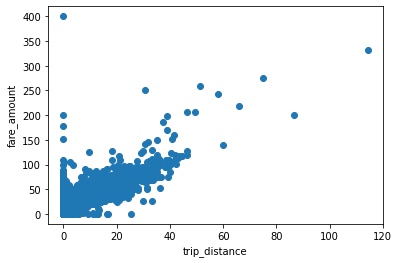

In [505]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

## Examining points with 0 trip distance

In [506]:
zero_trip_mask = train_copy['trip_distance'] == 0

In [507]:
zero_trip_data = train_copy[zero_trip_mask]

In [508]:
non_zero_fare = zero_trip_data['fare_amount'] != 0

In [509]:
zero_trip_data[non_zero_fare]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
6,1.0,1.0,0.0,1.0,N,234,234,1.0,2.5,2.5,0.600000
10,1.0,1.0,0.0,1.0,N,42,31,1.0,28.2,0.0,17.900000
26,2.0,5.0,0.0,1.0,N,239,238,2.0,5.0,2.5,5.966667
77,1.0,1.0,0.0,1.0,N,168,168,1.0,9.2,0.0,6.683333
78,2.0,1.0,0.0,2.0,N,237,237,1.0,52.0,2.5,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
59766,1.0,1.0,0.0,1.0,N,236,69,1.0,20.2,0.0,37.450000
59869,NaN,NaN,0.0,NaN,NaN,161,237,NaN,6.5,2.5,8.050000
59882,1.0,1.0,0.0,1.0,N,247,50,1.0,28.2,0.0,34.250000
59896,1.0,1.0,0.0,1.0,Y,26,29,1.0,20.2,0.0,24.866667


(array([492., 350., 323., 252., 176.,  72.,  99.,  20.,   7.,   0.,   2.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
        264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
        352., 360., 368., 376., 384., 392., 400.]),
 <BarContainer object of 50 artists>)

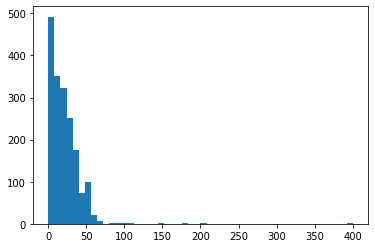

In [510]:
plt.hist(zero_trip_data['fare_amount'], bins = 50)

(array([1265.,    0.,    0.,  296.,    0.,    0.,   63.,    0.,    0.,
          16.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

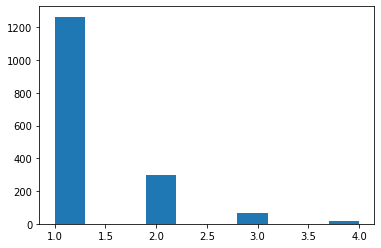

In [511]:
plt.hist(zero_trip_data['payment_type'])

In [512]:
zero_trip_data[zero_trip_data['fare_amount'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
1145,1.0,1.0,0.0,1.0,N,244,244,3.0,0.0,0.0,0.233333
7751,2.0,1.0,0.0,1.0,N,193,193,1.0,0.0,0.0,1.300000
8293,1.0,1.0,0.0,1.0,N,168,168,3.0,0.0,0.0,0.233333
9617,1.0,1.0,0.0,1.0,N,7,7,3.0,0.0,0.0,7.183333
11291,1.0,1.0,0.0,1.0,N,87,87,3.0,0.0,0.0,4.400000
14569,1.0,1.0,0.0,1.0,N,170,186,3.0,0.0,0.0,9.416667
17381,2.0,1.0,0.0,1.0,N,193,7,1.0,0.0,0.0,0.683333
21220,1.0,1.0,0.0,1.0,N,247,247,3.0,0.0,0.0,6.866667
28604,1.0,4.0,0.0,5.0,Y,138,264,2.0,0.0,0.0,0.000000
33541,1.0,1.0,0.0,5.0,Y,263,264,2.0,0.0,0.0,0.000000


In [513]:
sus = [28604, 33541, 39972, 53009]

In [514]:
train_copy = train_copy.drop(sus)

In [515]:
sus_index = zero_trip_data[(zero_trip_data['fare_amount'] != 0) & (zero_trip_data['fare_amount'] != zero_trip_data['congestion_surcharge'])].index

In [516]:
train_copy = train_copy.drop(sus_index)

Text(0, 0.5, 'fare_amount')

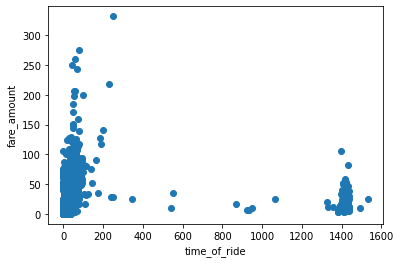

In [517]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

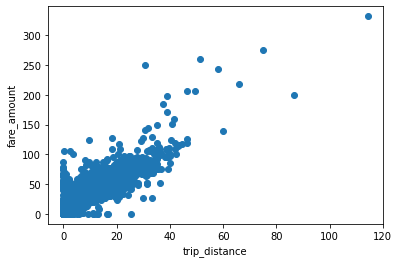

In [518]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

### Examining points with time_of_ride greater that 1200

In [519]:
masks = train_copy['time_of_ride'] >= 1200

In [520]:
high_time_of_ride = train_copy[masks]

In [521]:
high_time_of_ride.shape

(84, 11)

In [522]:
# just 84 data points. Very less compare to 57000. Removes all these points.

In [523]:
train_copy = train_copy.drop(high_time_of_ride.index)

In [524]:
train_copy.shape

(57881, 11)

Text(0, 0.5, 'fare_amount')

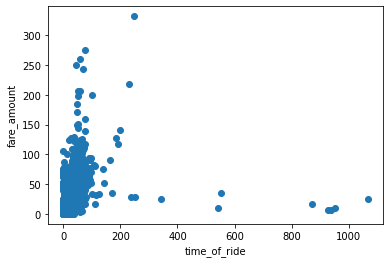

In [525]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

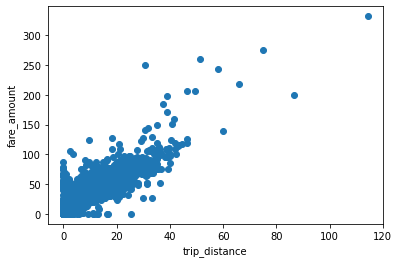

In [526]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

In [527]:
mask1 = train_copy['time_of_ride'] >= 200

In [528]:
data1 = train_copy[mask1]

In [529]:
data1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
3936,2.0,1.0,10.59,1.0,N,132,36,1.0,35.5,0.0,551.983333
9038,2.0,2.0,8.46,1.0,N,151,12,2.0,28.0,2.5,249.750000
9810,2.0,1.0,7.60,1.0,N,68,246,1.0,25.0,2.5,1066.583333
10959,2.0,2.0,9.65,1.0,N,244,264,2.0,29.0,0.0,237.783333
13382,1.0,1.0,114.30,1.0,N,186,170,1.0,332.0,2.5,249.350000
14201,2.0,1.0,7.38,1.0,N,107,181,2.0,24.5,2.5,343.466667
19749,2.0,1.0,1.99,1.0,N,231,79,1.0,9.5,2.5,540.766667
20212,2.0,1.0,1.89,1.0,N,226,129,2.0,9.5,0.0,951.366667
27260,2.0,1.0,1.08,1.0,N,7,265,2.0,7.0,0.0,926.450000
32238,2.0,1.0,1.13,1.0,N,140,237,1.0,6.0,2.5,936.516667


### Except for 13382 and 34805 all others are removed

In [530]:
data1 = data1.drop([13382, 34805])

In [531]:
train_copy = train_copy.drop(data1.index)

Text(0, 0.5, 'fare_amount')

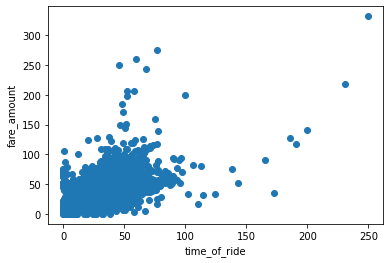

In [532]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

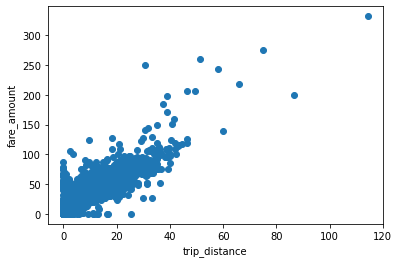

In [533]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

### data points with payment type 3 but non zero charge

In [534]:
mask2 = (train_copy['payment_type'] == 3) & (train_copy['fare_amount'] != 0)

In [535]:
ind2 = train_copy[mask2].index

In [536]:
train_copy = train_copy.drop(ind2)

In [537]:
train_copy.shape

(57450, 11)

Text(0, 0.5, 'fare_amount')

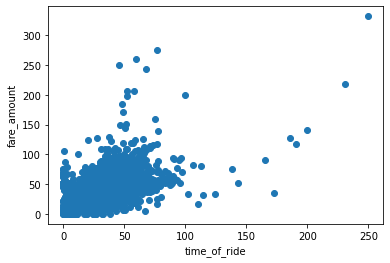

In [538]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

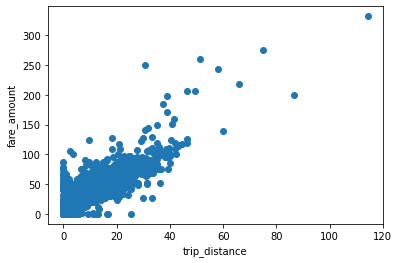

In [539]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

## Examining data points with 0 passengers

In [540]:
zero_pass_mask = train_copy['passenger_count'] == 0

In [541]:
zero_pass_data = train_copy[zero_pass_mask]

In [542]:
zero_pass_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
7,1.0,0.0,1.2,1.0,N,238,142,1.0,5.5,2.5,3.650000
15,1.0,0.0,1.1,1.0,N,161,137,1.0,7.0,2.5,7.466667
61,1.0,0.0,3.6,1.0,N,107,66,1.0,14.0,2.5,15.550000
139,1.0,0.0,0.6,1.0,N,74,75,2.0,4.0,0.0,1.583333
206,1.0,0.0,2.3,1.0,N,137,262,1.0,8.5,2.5,6.483333
...,...,...,...,...,...,...,...,...,...,...,...
59815,1.0,0.0,4.1,1.0,N,132,10,2.0,13.5,0.0,9.500000
59817,1.0,0.0,1.7,1.0,N,170,148,1.0,8.5,2.5,8.600000
59956,1.0,0.0,3.1,1.0,N,231,246,1.0,13.0,2.5,13.983333
59984,1.0,0.0,1.9,1.0,N,48,68,1.0,8.0,2.5,7.616667


In [543]:
ind3 = zero_pass_data[(zero_pass_data['fare_amount']) != (zero_pass_data['congestion_surcharge'])].index

In [544]:
zero_pass_data[(zero_pass_data['fare_amount']) != (zero_pass_data['congestion_surcharge'])]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
7,1.0,0.0,1.2,1.0,N,238,142,1.0,5.5,2.5,3.650000
15,1.0,0.0,1.1,1.0,N,161,137,1.0,7.0,2.5,7.466667
61,1.0,0.0,3.6,1.0,N,107,66,1.0,14.0,2.5,15.550000
139,1.0,0.0,0.6,1.0,N,74,75,2.0,4.0,0.0,1.583333
206,1.0,0.0,2.3,1.0,N,137,262,1.0,8.5,2.5,6.483333
...,...,...,...,...,...,...,...,...,...,...,...
59815,1.0,0.0,4.1,1.0,N,132,10,2.0,13.5,0.0,9.500000
59817,1.0,0.0,1.7,1.0,N,170,148,1.0,8.5,2.5,8.600000
59956,1.0,0.0,3.1,1.0,N,231,246,1.0,13.0,2.5,13.983333
59984,1.0,0.0,1.9,1.0,N,48,68,1.0,8.0,2.5,7.616667


In [549]:
mask4 = (zero_pass_data['fare_amount']) != (zero_pass_data['congestion_surcharge'])
ind4 = zero_pass_data[mask4].index

In [550]:
train_copy = train_copy.drop(ind4)

Text(0, 0.5, 'fare_amount')

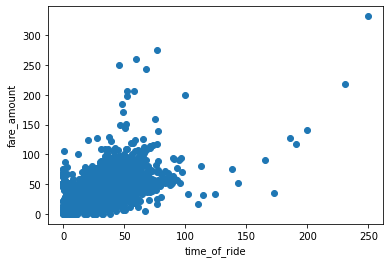

In [552]:
plt.scatter(train_copy['time_of_ride'], train_copy['fare_amount'])
plt.xlabel('time_of_ride')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

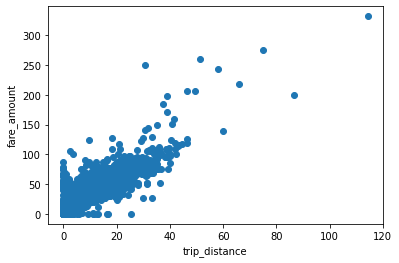

In [553]:
plt.scatter(train_copy['trip_distance'], train_copy['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

In [554]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56188 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              50717 non-null  float64
 1   passenger_count       50717 non-null  float64
 2   trip_distance         56188 non-null  float64
 3   RatecodeID            50717 non-null  float64
 4   store_and_fwd_flag    50717 non-null  object 
 5   PULocationID          56188 non-null  int64  
 6   DOLocationID          56188 non-null  int64  
 7   payment_type          50717 non-null  float64
 8   fare_amount           56188 non-null  float64
 9   congestion_surcharge  56188 non-null  float64
 10  time_of_ride          56188 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.1+ MB


In [556]:
train_copy.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'congestion_surcharge', 'time_of_ride'],
      dtype='object')

In [557]:
train_copy['VendorID'].value_counts()

2.0    31782
1.0    18935
Name: VendorID, dtype: int64

In [558]:
train_copy['passenger_count'].value_counts()

1.0    40449
2.0     6096
3.0     1513
5.0     1207
6.0      960
4.0      489
0.0        3
Name: passenger_count, dtype: int64

In [563]:
train_copy['RatecodeID'].value_counts() # rate code of 99 is present both in test as well as train
# presuming it is supposed to be 6

1.0     49970
2.0       534
5.0       108
4.0        60
3.0        44
99.0        1
Name: RatecodeID, dtype: int64

In [573]:
mask5 = (train_copy['PULocationID'] != train_copy['DOLocationID']) & (train_copy['trip_distance'] == 0)

In [574]:
train_copy[mask5]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,time_of_ride
1828,2.0,2.0,0.0,1.0,N,100,48,2.0,2.5,2.5,0.916667
2183,1.0,1.0,0.0,1.0,N,142,264,2.0,2.5,2.5,0.000000
6839,1.0,1.0,0.0,1.0,N,238,264,2.0,2.5,2.5,0.000000
10095,2.0,2.0,0.0,1.0,N,264,146,2.0,2.5,2.5,0.350000
14117,1.0,1.0,0.0,1.0,N,43,264,2.0,2.5,2.5,0.000000
14569,1.0,1.0,0.0,1.0,N,170,186,3.0,0.0,0.0,9.416667
17170,2.0,1.0,0.0,1.0,N,107,137,2.0,2.5,2.5,0.533333
17381,2.0,1.0,0.0,1.0,N,193,7,1.0,0.0,0.0,0.683333
19338,2.0,1.0,0.0,1.0,N,100,164,1.0,2.5,2.5,0.750000
23217,2.0,1.0,0.0,1.0,N,48,100,2.0,2.5,2.5,0.750000


#### These point are fine

In [576]:
train_copy['payment_type'].value_counts() # 6 is missing

1.0    32970
2.0    17621
4.0      114
3.0        9
5.0        3
Name: payment_type, dtype: int64

In [578]:
train_copy.to_csv('taxi_train_data.csv', index = False)

In [579]:
indexes = train_copy.index

In [580]:
train_copy['tpep_pickup_datetime'] = train['tpep_pickup_datetime'][indexes]
train_copy['tpep_dropoff_datetime'] = train['tpep_dropoff_datetime'][indexes]

In [582]:
train_final = train_copy.drop(columns=['time_of_ride'])

In [584]:
train_final.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'congestion_surcharge', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime'],
      dtype='object')

In [585]:
train_final.shape

(56188, 12)

In [589]:
label_final = train_final.pop('fare_amount')

In [593]:
x_train, x_val, y_train, y_val = train_test_split(train_final, label_final, test_size = 0.2)

In [598]:
x_train.to_csv('x_train_final.csv', index = False)
y_train.to_csv('y_train_final.csv', index = False)
x_val.to_csv('x_val_final.csv', index = False)
y_val.to_csv('y_val_final.csv', index = False)

 2.5    7840
 0.0    2124
-2.5      36
Name: congestion_surcharge, dtype: int64